In [ ]:
import geemap
import ee
from egis.utils import (
    vis_params_dict, extract_single_img
)

In [ ]:
ee.Initialize()

In [ ]:
vis_params = vis_params_dict(bands=['B4','B3','B2'],
                                     min=0,
                                     max=3000,
                                     gamma=1.4)

In [ ]:
def visualize_img(img, center_coords, zoom, vis_params):
    
    sentinel_image = ee.Image(img)
    sentinel_map = geemap.Map(center=[center_coords[1], center_coords[0]], zoom=zoom)
    sentinel_map.addLayer(sentinel_image, vis_params)
    
    return sentinel_map

Volcano Semisopochnoi Island

In [ ]:
img = 'COPERNICUS/S2_SR_HARMONIZED/20220514T230529_20220514T230938_T01UBT'
center_coords = [179.589742, 51.92678]

In [ ]:
sentinel_map = visualize_img(img, center_coords, 12, vis_params)
sentinel_map

Ukraine Berdyansk port fire

In [ ]:
img = 'COPERNICUS/S2_SR_HARMONIZED/20220324T082609_20220324T083426_T37TCM'
center_coords = [36.775451, 46.751117]

In [ ]:
sentinel_map = visualize_img(img, center_coords, 14, vis_params)
sentinel_map

Oil spill?

California fire

In [ ]:
img = 'COPERNICUS/S2_SR_HARMONIZED/20210723T184919_20210723T185617_T10TFK'
center_coords = [-121.207027, 39.974856]

In [ ]:
sentinel_map = visualize_img(img, center_coords, 10, vis_params)
sentinel_map

Las Vegas

In [ ]:
img = 'COPERNICUS/S2_SR_HARMONIZED/20220724T181931_20220724T183355_T11SPA'
center_coords = [-115.137963, 36.129189]

In [ ]:
sentinel_map = visualize_img(img, center_coords, 14, vis_params)
sentinel_map

Garden city, US, Kansas

In [ ]:
img = 'COPERNICUS/S2_SR_HARMONIZED/20220813T172859_20220813T173647_T14SLH'
center_coords = [-100.897585, 37.973621]

In [ ]:
sentinel_map = visualize_img(img, center_coords, 12, vis_params)
sentinel_map

## Linked maps

Definitions:
- https://gisgeography.com/sentinel-2-bands-combinations/
- Sentinel Hub Playground
- https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/composites/

From: https://awesome-ee-spectral-indices.readthedocs.io/en/latest/

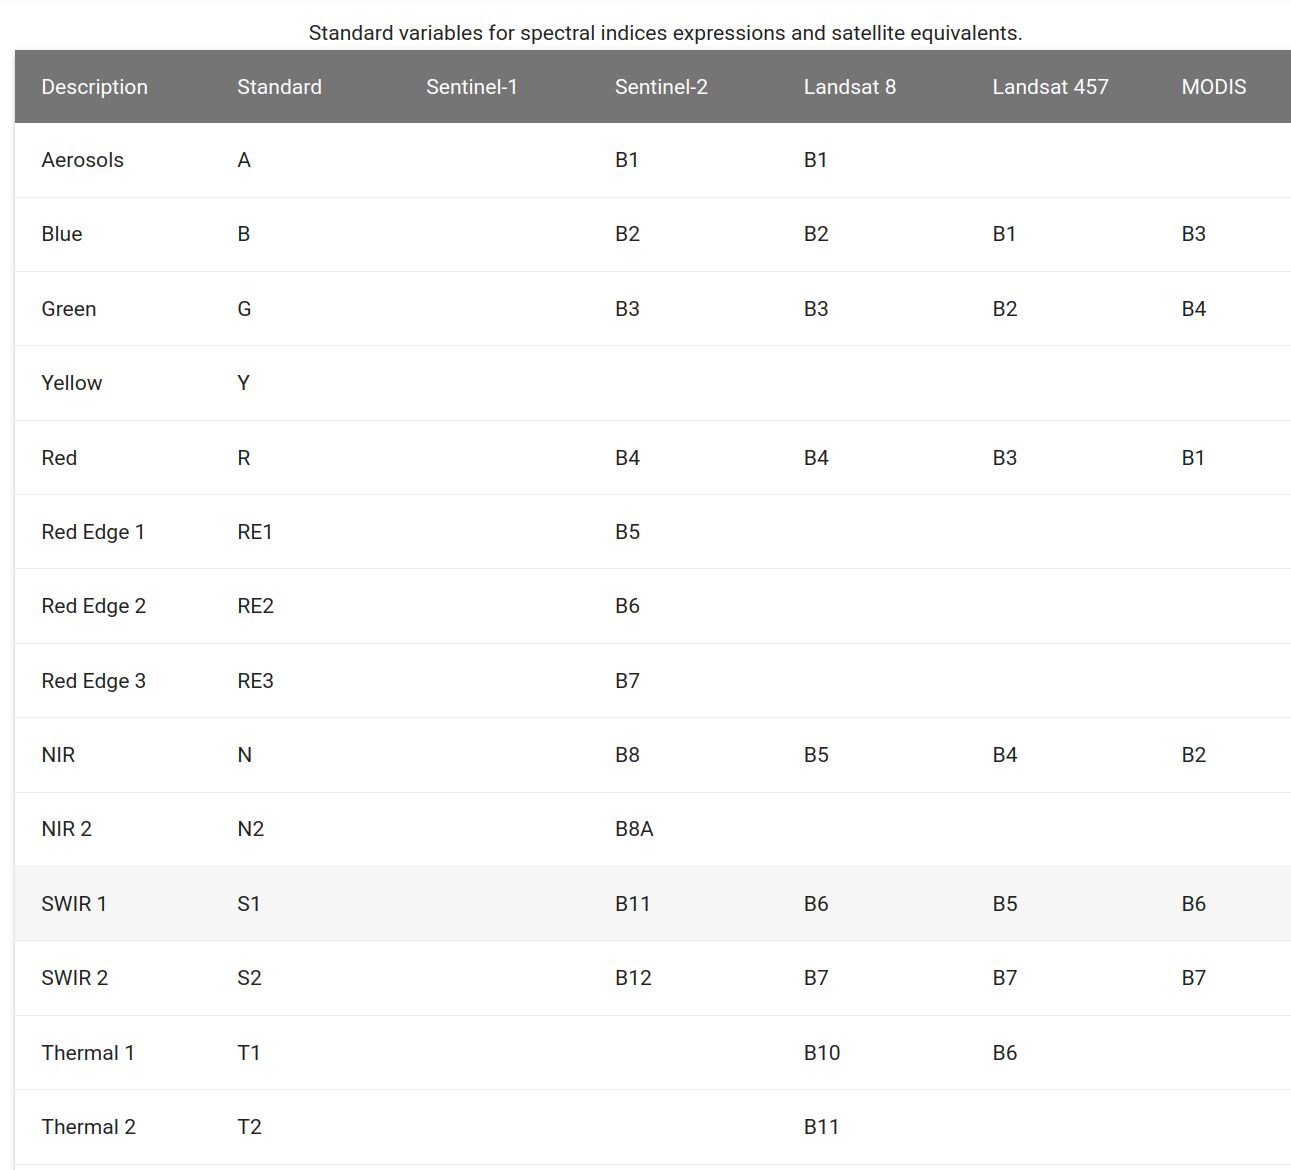

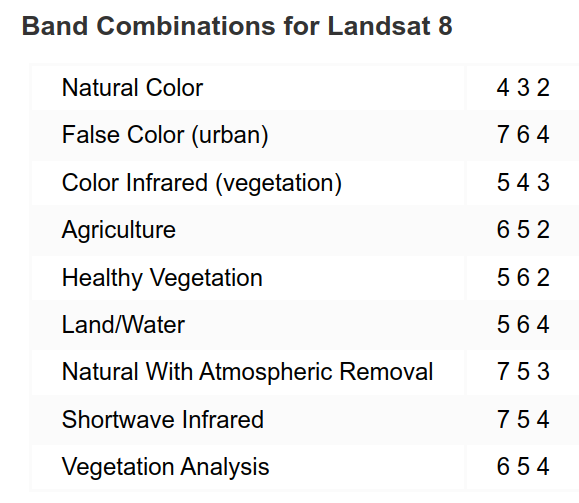

Landsat in S2:
- natural color: 4, 3, 2
- urban: 12, 11, 4
- vegetation: 8, 4, 3
- agriculture: 11, 8, 2
- healthy vegetation: 8, 11, 2
- land/water: 8, 11, 4
- natural w. atmos. remo: 12, 8, 3
- swir: 12, 8, 4
- vegetation anal.: 11, 8, 4

- vegetationPalette = cm.palettes.ndvi
- waterPalette = cm.palettes.ndwi
- burnPalette = cm.palettes.inferno

In [ ]:
vegetation = [8, 4, 3] # 'Color Infrared (B8/B4/B3)'
urban = [12, 11, 4] #  'Vegetation (B12/B11/B4)',  LS: 7,6,4
agriculture = [11, 8, 2] # Agriculture (B11, B8, B2) - check
geology = [12, 4, 2] # Geology (B12, B11, B2) - 12,11,2
bathymetrics = [4, 3, 1] # Bathymetric (B4, B3, B1) - check
atmospheric_penetration = [12, 11, 8A?] # 
swir = [12, 8A, 4] # Short-Wave Infrared (B12, B8A, B4) - check


# spectral indices
vegetation_index = (B8 - B4)/(B8+ B4)
moisture_index = (B8a-B11)/(B8a+B11) # Moisture Index (B8A-B11)/(B8A+B11)
ndvi = (B3-B8)/(B3+B8)


In [ ]:
vis_params = [
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000, 'gamma': 1.4},
    {'bands': ['B8', 'B11', 'B4'], 'min': 0, 'max': 3000, 'gamma': 1.4},
    {'bands': ['B8', 'B4', 'B3'], 'min': 0, 'max': 3000, 'gamma': 1.4},
    {'bands': ['B12', 'B12', 'B4'], 'min': 0, 'max': 3000, 'gamma': 1.4},
]

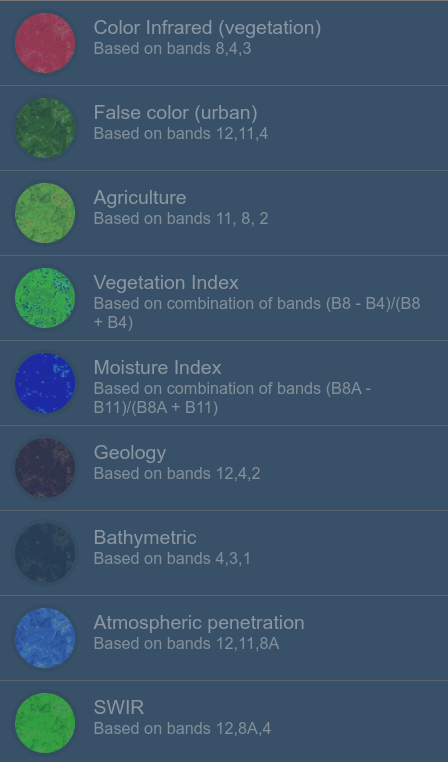

In [ ]:
labels = [
    'Natural Color (B4/B3/B2)',
    'Land/Water (B8/B11/B4)',
    'Color Infrared (B8/B4/B3)',
    'Vegetation (B12/B11/B4)',
]

In [ ]:
geemap.linked_maps(
    rows=2,
    cols=2,
    height="400px",
    center=[37.973621, -100.897585],
    zoom=12,
    ee_objects=[ee.Image(img)],
    vis_params=vis_params,
    labels=labels,
    label_position="topright",
)